In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob,cv2, re, math
%matplotlib inline
base_load_path = 'save/'
def handle_final_filed(video_name = 'v3', filedid = None):
    load_path = "{}final_info_{}.csv".format(base_load_path,video_name)
    df1 = pd.read_csv(load_path,index_col=0)
    if filedid is not None:
        title = 'final state region_id:{}'.format(filedid)
        plt.title(title)
        row = df1.loc[filedid]
        row.plot(kind='bar')
    else:
        df1.T.plot.bar(rot=0)
        
    
def handle_period_file_count(video_name = 'v3', filedid = None):
    load_path = "{}time_split/{}/".format(base_load_path,video_name)
    time_proid = os.listdir(load_path)
    time_proid.sort(key=lambda x: int(x.split('_')[0]))

    
    result_data = pd.DataFrame()
    for time in time_proid:
        proid_load_path = "{}{}/filed_total_count.csv".format(load_path, time)

#         print(proid_load_path)
        
        df = pd.read_csv(proid_load_path, index_col=0, header=0)
        checked = False
        if not df.empty:
            for fid in list(df.index.values):
#                 print("fid in read:{}".format(fid))
                if fid not in result_data.index:
#                     print(" in append ")
                    total_count = df.loc[fid]['total_count']
                    row = pd.DataFrame([[total_count]],columns=[time], index = [fid])
#                     print("row:")
#                     print(row)
#                     print("result data after append")
                    result_data = result_data.append(row)
                    checked = True
            if not checked:
#                 print(df)
                col = df['total_count'].tolist()
                result_data[time] = col
    result_data = result_data.fillna(0)
    result_data.index.names = ['fid']
   
    
    if filedid:
        row = result_data.loc[filedid]
        title = 'time_period_totoal_count region_id: {} '.format(filedid)
        plt.title(title)
        row.plot(kind='line')
    else:
        result_data.T.plot.line()
        
def handle_period_people_count(video_name = 'v3', filedid = None):
    load_path = "{}time_split/{}/".format(base_load_path,video_name)
    time_proid = os.listdir(load_path)
    time_proid.sort(key=lambda x: int(x.split('_')[0]))
    result_data = pd.DataFrame()
    for time in time_proid:
        proid_load_path = "{}{}/total_people_count.csv".format(load_path, time)
#         print(proid_load_path)
        df = pd.read_csv(proid_load_path)
#         print(df)
        total_count = df['total_people_count'].tolist()[0]
#         print(total_count)
        result_data[time] = [total_count]
    result_data.index.name = 'total_peopel_count'
    result_data.reset_index()
    result_data.T.plot.line()
    
def print_all_path(video_name = 'v3', filedid = None):
    load_path = "{}time_split/{}/".format(base_load_path,video_name)
#     print(load_path)
    time_proid = os.listdir(load_path)
    time_proid.sort(key=lambda x: int(x.split('_')[0]))
    cen_paths_dict = dict()
    
    background_path = "save/background_{}.jpg".format(video_name)
    baackground = cv2.imread(background_path)
#     print(baackground)
    weight = dict()
    for time in time_proid:
        proid_load_path = "{}{}/".format(load_path, time)
#         print(proid_load_path)
        paths = glob.glob(r'{}missing_pid*'.format(proid_load_path))
        if paths:
            for path in paths:
                df = pd.read_csv(path)
                x = df['x'].tolist()
                y = df['y'].tolist()
                cors = list(zip(x,y))
                for cor in cors:
                    if cor not in weight.keys():
                        weight[cor] = 1
                    else:
                        weight[cor]+=10
                    cv2.circle(baackground,cor, 1, (255, 255, 255), -1)
    num = []
#     print(weight.values())      
    for i in weight.values():
        if i > 5:
            num.append(i)
    if num:
        color = np.percentile(num, (25, 50, 75), interpolation='midpoint')
        max_weight = max(num)


        for path,val in weight.items():
            if color[1] >= val >= color[0]:
                cv2.circle(baackground,path, 1, (255, 255, 0), -1)
    #             print("blue{}".format(val))
            elif color[2] > val >= color[1]:
                cv2.circle(baackground,path, 1, (0, 255, 255), -1)
    #             print("yellow{}".format(val))
            elif color[2] >= val >= color[1]:
                cv2.circle(baackground,path, 1, (255, 0, 255), -1)
    #             print("pink{}".format(val))
            elif val > color[2]:
                cv2.circle(baackground,path, 1, (0, 0, 255), -1)
    #             print("red{}".format(val))        
    img = cv2.resize(baackground, (1600, 800), interpolation=cv2.INTER_CUBIC)
    cv2.imshow('path', img)  
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    
def handle_all_Pimg(video_name = 'v3', col = 4, filedid = None):
    def print_img(key):
#         print("key:{}".format(key))
        fig = plt.figure()
        fig.set_figheight(15)
        fig.set_figwidth(15)
        fig.suptitle("fid_{}".format(key))
        length = len(fild_dict[key])
        row = math.ceil(length/ col)
#         print("row:{}".format(row))
#         print("length:{}".format(length))
        pids = list(fild_dict[key].keys())
#         print("pids:{}".format(pids))
    
        for i in range(1, length+1):
            try:
                gird = row*100+col*10+i
    #             print("i:{}".format(i))
#                 print("grid:{}".format(gird))
                plt.subplot(gird)
#                 print("fid:{}".format(fid))

                plt.imshow(fild_dict[key][pids[i-1]])
    #             print("fid:{}".format(fid))
    #         print("-"*52)
            except ValueError :
                continue
    
    load_path = "{}time_split/{}/".format(base_load_path,video_name)
#     print(load_path)
    time_proid = os.listdir(load_path)
    time_proid.sort(key=lambda x: int(x.split('_')[0]))
    fild_dict = dict()
    for time in time_proid:
        proid_load_path = "{}{}/".format(load_path, time)
        paths = glob.glob(r'{}fid_*'.format(proid_load_path))
        if paths:
            for path in paths:
#                 print(path)
                ids= re.findall(r'(\d+)_pid_(\d+).jpg$', path)
                fid = ids[0][0]
                pid = ids[0][1]
                if fid not in fild_dict.keys():
                    fild_dict[fid] = dict()
                    img = cv2.imread(path)
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    fild_dict[fid][pid] = img_rgb
                else:
                    img = cv2.imread(path)
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    fild_dict[fid][pid] = img_rgb
#     print(fild_dict)

    if filedid:
        print_img(str(filedid))
    else:
        for key in fild_dict.keys():
            print_img(key)
def print_menu():
#     print("enter choice: (enter q to quit)")
    choice = int(input("0. final region state\n1. period_region_count\n2. total_people_count\n3. print_all_path\n4. wait over threshold people imgs"))
    return choice

def print_all(video_name):
    handle_final_filed(video_name)
    handle_period_file_count(video_name)
    handle_period_people_count(video_name)
    handle_all_Pimg(video_name)

In [2]:



# list_function = list()
# list_function.append(handle_final_filed)
# list_function.append(handle_period_file_count)
# list_function.append(handle_period_people_count)
# list_function.append(print_all_path)
# list_function.append(handle_all_Pimg)
# choice_list = [0,1,2,3,4]
# # list_function[4]()

# choice = print_menu()
# # if choice == 'q':
# #     break
# # if choice not in choice_list:
# #     continue
# vname = input("Enter video name: ,0 means default v3")
# if vname == '0':
#     vname = 'v3'
# try:   
#     if choice!=3:
#         fid = int(input("Enter region id: ,0 means all"))
#         if fid == 0:
#             fid = None
#         print("choice:{}, vname:{}, fid:{}".format(choice, vname, fid))
#         list_function[choice](video_name = vname, filedid = fid)
#     else:
#         print("choice:{}, vname:{}, ".format(choice, vname))
#         list_function[choice](video_name = vname)
# except KeyError as e:
#     print("error:{}".format(e))

    
        


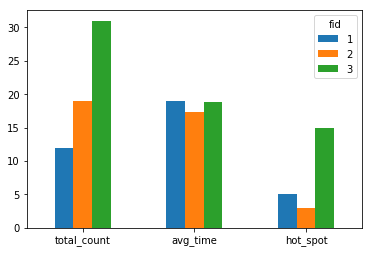

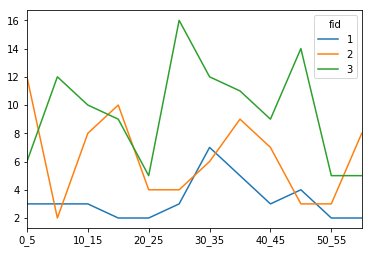

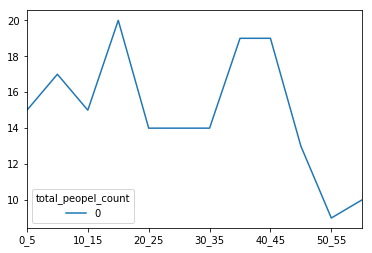

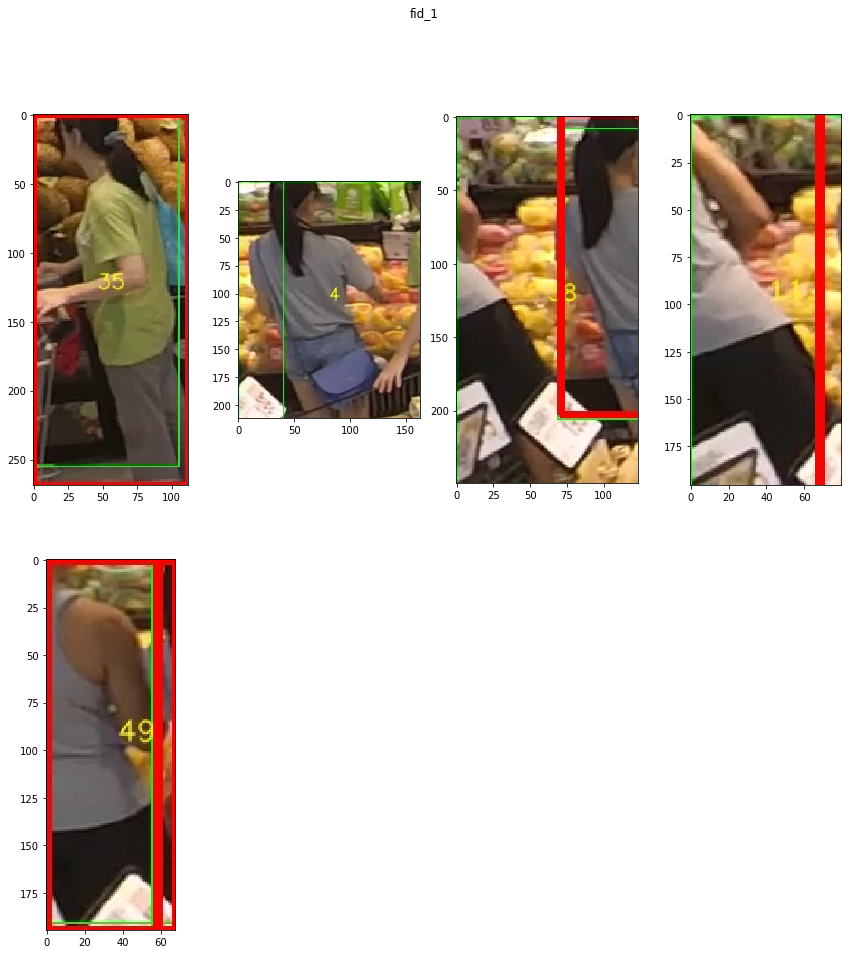

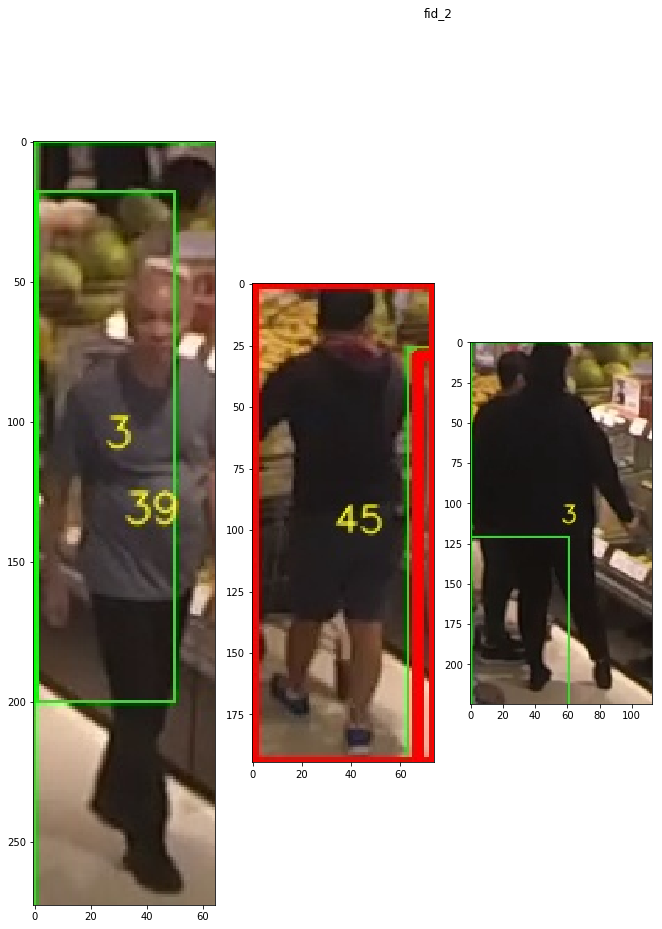

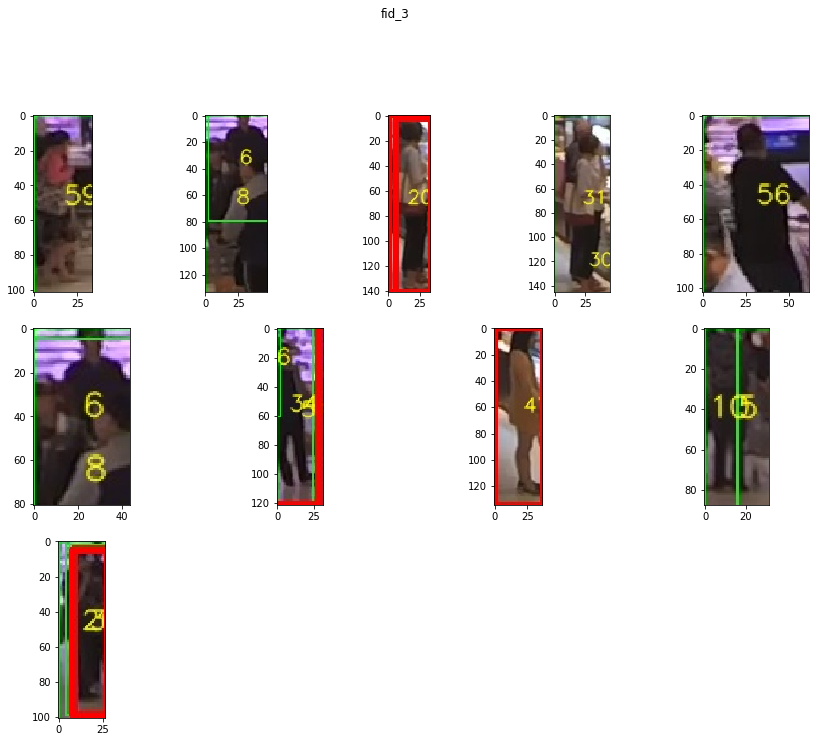

In [ ]:

print_all('v54')


In [ ]:
print_all_path('v52')